In [26]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph
from MLP.utils import data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss('data/PLdata_bh_34.mat')
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss('data/PLdata_bh_53.mat')
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss('data/PLdata_bh_64.mat')

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss('data/PLdata_ma_34.mat')
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss('data/PLdata_ma_53.mat')
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss('data/PLdata_ma_64.mat')

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)

<Bundang>


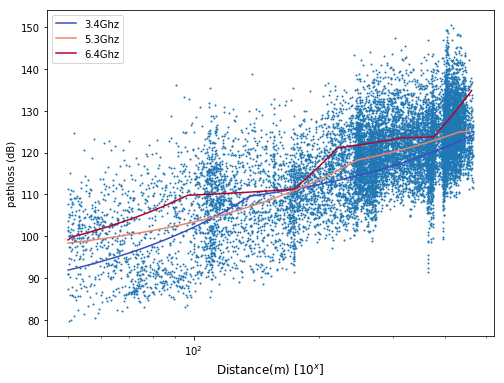

RMSE(dB),train error,test error
3.4Ghz,6.95698,7.30910
5.3Ghz,7.06654,7.06118
6.4Ghz,7.47455,7.59545


In [204]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (120), 'relu', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (120), 'relu', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (120), 'relu', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'relu', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Bundang>


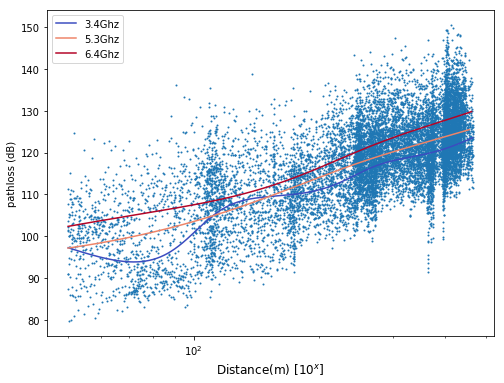

RMSE(dB),train error,test error
3.4Ghz,6.86877,7.17800
5.3Ghz,7.08288,7.03995
6.4Ghz,7.52014,7.63201


In [206]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'logistic', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Bundang>


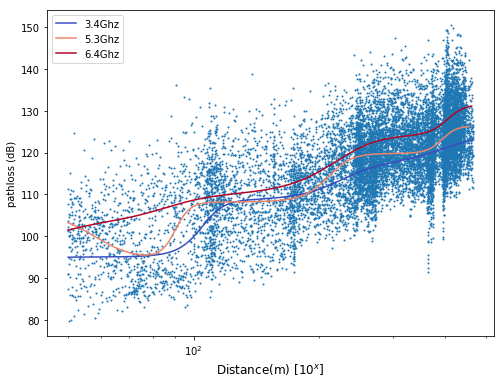

RMSE(dB),train error,test error
3.4Ghz,6.86886,7.18721
5.3Ghz,6.89470,6.87485
6.4Ghz,7.43581,7.55313


In [207]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (60), 'tanh', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (60), 'tanh', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (60), 'tanh', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'tanh', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


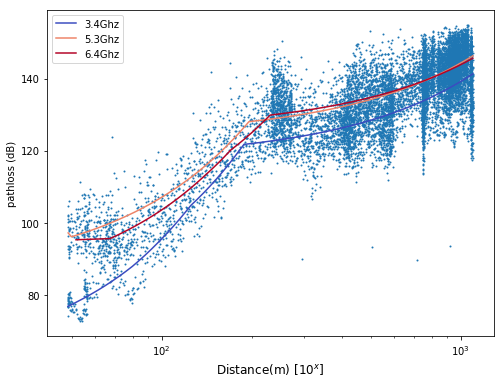

RMSE(dB),train error,test error
3.4Ghz,6.70080,6.92932
5.3Ghz,6.03717,5.90108
6.4Ghz,6.05050,5.74671


In [209]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_ma_34, y_train_ma_34, (60), 'relu', 'lbfgs')
dataX.append(X_train_ma_34)
dataY.append(y_train_ma_34)
dataPredX.append(model_34.predict(X_train_ma_34))
model_53 = mlp_regression(X_train_ma_53, y_train_ma_53, (60), 'relu', 'lbfgs')
dataX.append(X_train_ma_53)
dataY.append(y_train_ma_53)
dataPredX.append(model_53.predict(X_train_ma_53))
model_64 = mlp_regression(X_train_ma_64, y_train_ma_64, (60), 'relu', 'lbfgs')
dataX.append(X_train_ma_64)
dataY.append(y_train_ma_64)
dataPredX.append(model_64.predict(X_train_ma_64))

print("<Mokdong>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_ma, y_train_ma, 'relu', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model_34,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model_53,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model_53,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model_64,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model_64,X_test_ma_64, y_test_ma_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


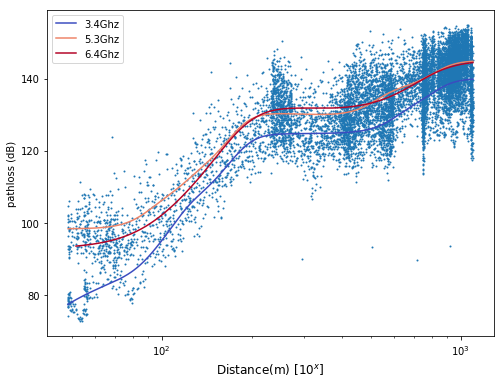

RMSE(dB),train error,test error
3.4Ghz,6.54660,6.69168
5.3Ghz,5.86521,5.83177
6.4Ghz,5.91440,5.65357


In [210]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_ma_34, y_train_ma_34, (60), 'logistic', 'lbfgs')
dataX.append(X_train_ma_34)
dataY.append(y_train_ma_34)
dataPredX.append(model_34.predict(X_train_ma_34))
model_53 = mlp_regression(X_train_ma_53, y_train_ma_53, (60), 'logistic', 'lbfgs')
dataX.append(X_train_ma_53)
dataY.append(y_train_ma_53)
dataPredX.append(model_53.predict(X_train_ma_53))
model_64 = mlp_regression(X_train_ma_64, y_train_ma_64, (60), 'logistic', 'lbfgs')
dataX.append(X_train_ma_64)
dataY.append(y_train_ma_64)
dataPredX.append(model_64.predict(X_train_ma_64))

print("<Mokdong>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_ma, y_train_ma, 'logistic', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model_34,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model_53,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model_53,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model_64,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model_64,X_test_ma_64, y_test_ma_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


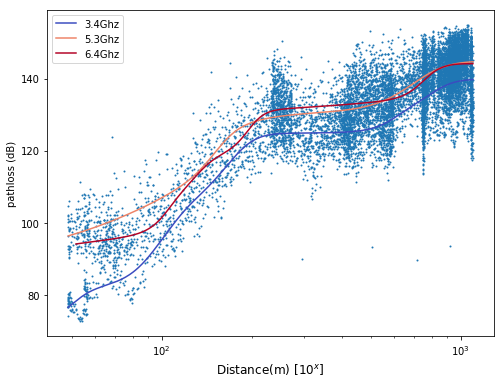

RMSE(dB),train error,test error
3.4Ghz,6.54630,6.68528
5.3Ghz,5.94061,5.81931
6.4Ghz,5.90916,5.67288


In [211]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_ma_34, y_train_ma_34, (60), 'tanh', 'lbfgs')
dataX.append(X_train_ma_34)
dataY.append(y_train_ma_34)
dataPredX.append(model_34.predict(X_train_ma_34))
model_53 = mlp_regression(X_train_ma_53, y_train_ma_53, (60), 'tanh', 'lbfgs')
dataX.append(X_train_ma_53)
dataY.append(y_train_ma_53)
dataPredX.append(model_53.predict(X_train_ma_53))
model_64 = mlp_regression(X_train_ma_64, y_train_ma_64, (60), 'tanh', 'lbfgs')
dataX.append(X_train_ma_64)
dataY.append(y_train_ma_64)
dataPredX.append(model_64.predict(X_train_ma_64))

print("<Mokdong>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_ma, y_train_ma, 'tanh', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model_34,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model_53,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model_53,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model_64,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model_64,X_test_ma_64, y_test_ma_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))